# **1. Perkenalan Dataset**


Dataset yang digunakan pada proyek ini adalah **Online Shoppers Purchasing Intention Dataset**
yang diperoleh dari **UCI Machine Learning Repository**.

Dataset ini merepresentasikan perilaku pengunjung situs e-commerce selama satu sesi kunjungan (session-based data),
dengan tujuan untuk memprediksi apakah seorang pengunjung akan melakukan transaksi pembelian
(`Revenue = TRUE`) atau tidak (`Revenue = FALSE`).

Setiap baris data merepresentasikan satu sesi pengguna, dengan kombinasi fitur numerik,
kategorikal, dan perilaku browsing.

**Sumber dataset:**
https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

**Target Variabel  → Revenue**
- True → Pengunjung melakukan pembelian
- False → Pengunjung tidak melakukan pembelian

# **2. Import Library**

In [3]:
import sys
!"{sys.executable}" -m pip install "mlflow==2.19.0"


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np

# Visualization & EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

import mlflow
import mlflow.sklearn
import os
import json
import joblib
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# **3. Memuat Dataset**

In [5]:
import os
print(os.getcwd())

c:\Kuliah\Dicoding Asah\SMSML_Final\Eksperimen_SML_Naysa-Syifa-Nuristiani\preprocessing


In [ ]:
df = pd.read_csv("../online_shoppers_intention_raw/online_shoppers_intention.csv")
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

In [11]:
print(f"Jumlah baris : {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris : 12330
Jumlah kolom: 18


In [13]:
df['Revenue'].value_counts(normalize=True) * 100

Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64

In [17]:
print(df.duplicated().sum())
df.isna().sum()

125


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [20]:
display(df.describe(include="all"))

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [21]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()

print("\nKolom numerik:", num_cols)
print("Kolom kategorikal:", cat_cols)


Kolom numerik: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Kolom kategorikal: ['Month', 'VisitorType', 'Weekend', 'Revenue']


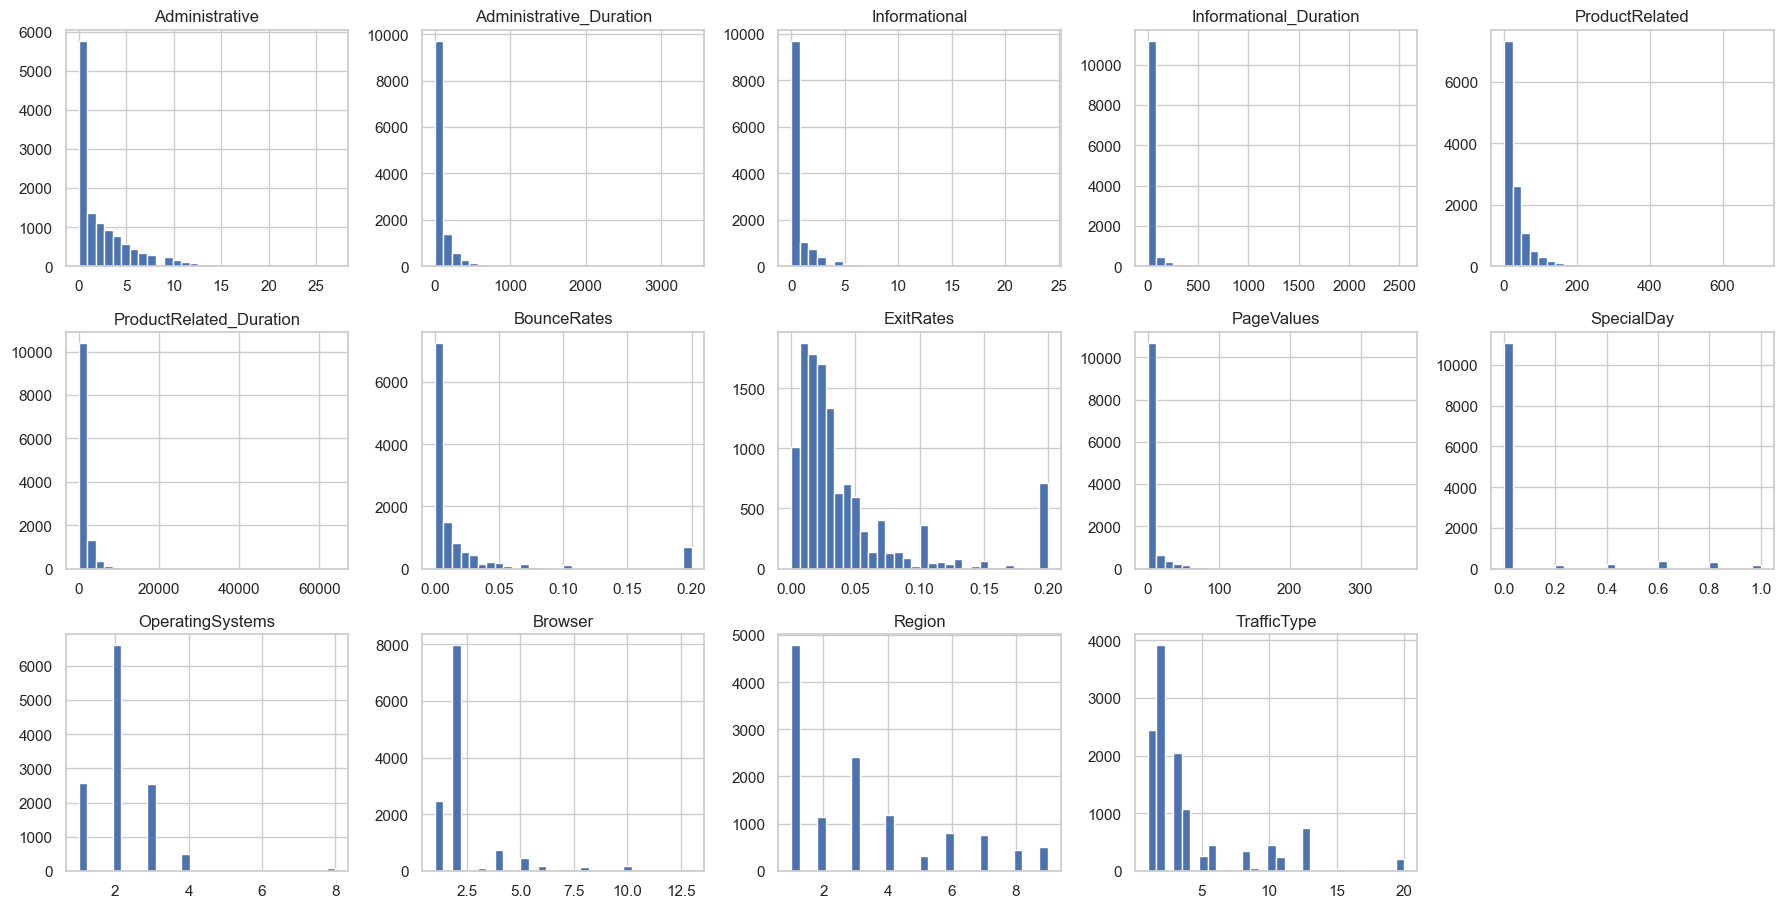

In [54]:
df[num_cols].hist(bins=30, layout=(4, 5), figsize=(18, 12))
plt.tight_layout()
plt.show()

In [23]:
for col in cat_cols:
    print(f"\nDistribusi {col}:")
    print(df[col].value_counts())



Distribusi Month:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

Distribusi VisitorType:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

Distribusi Weekend:
Weekend
False    9462
True     2868
Name: count, dtype: int64

Distribusi Revenue:
Revenue
False    10422
True      1908
Name: count, dtype: int64


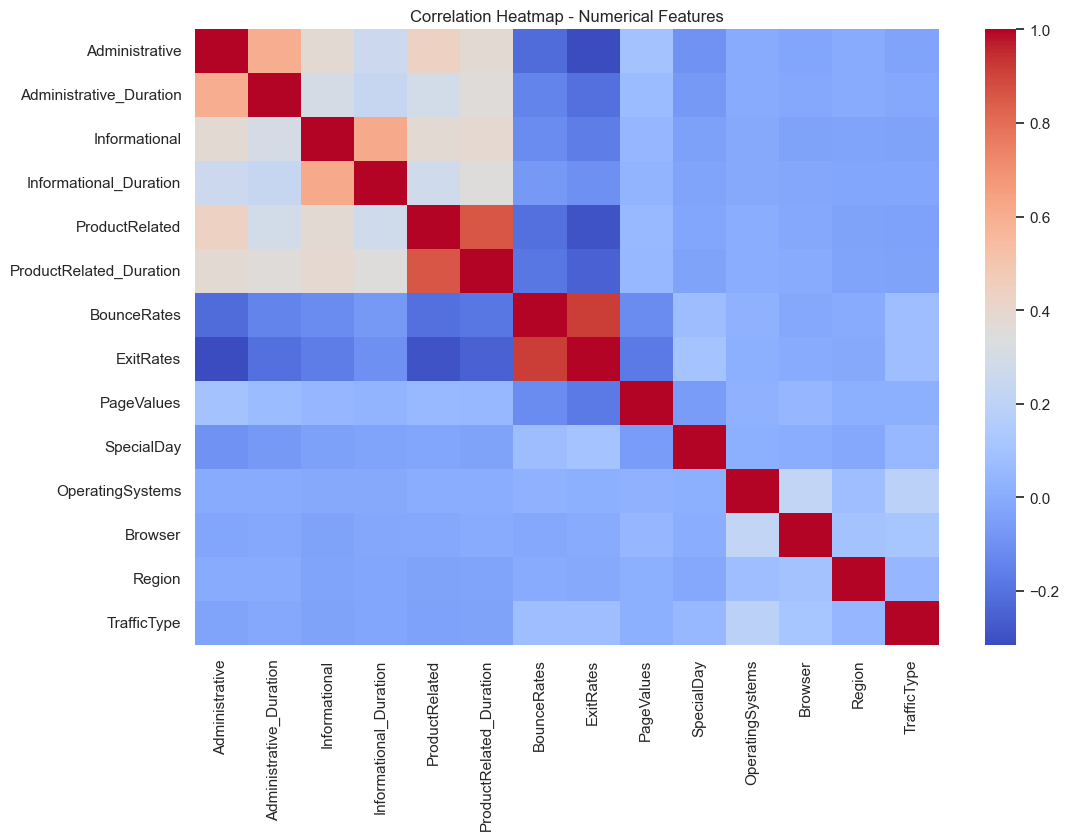

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap - Numerical Features")
plt.show()

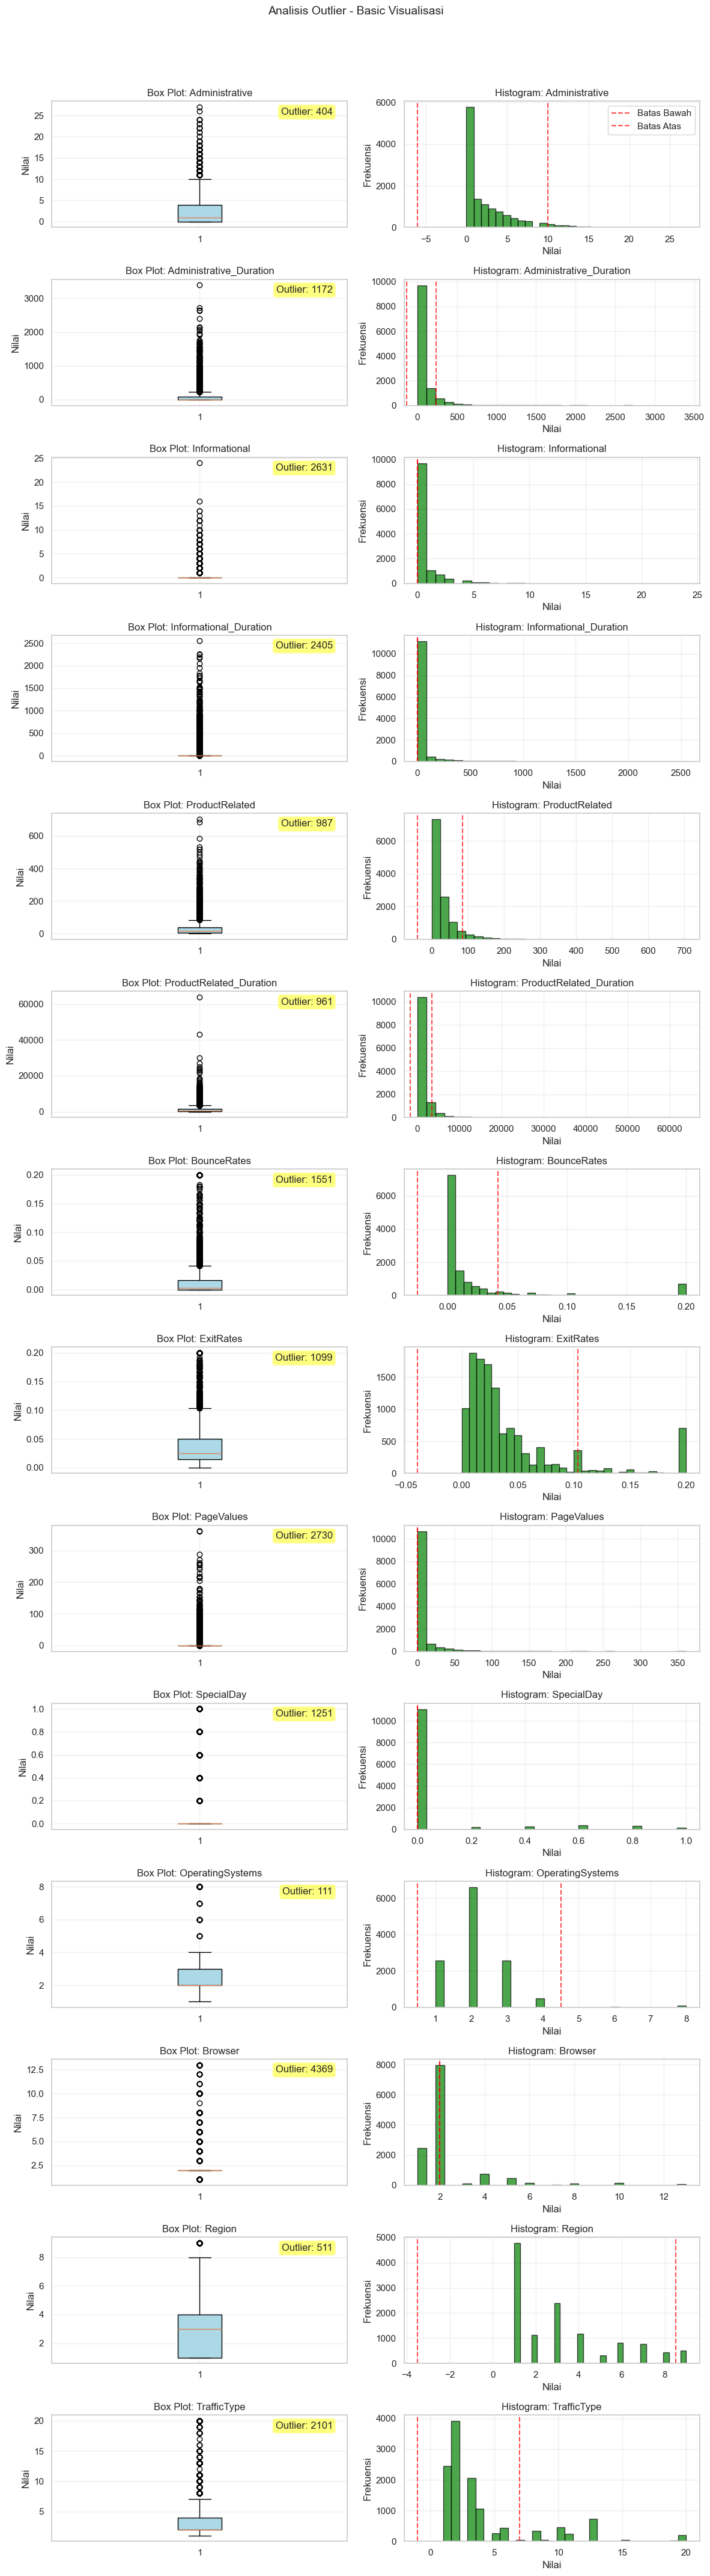

In [58]:
def plot_outliers_basic(df, numerical_cols):
    n = len(numerical_cols)
    fig, axes = plt.subplots(n, 2, figsize=(12, 3 * n))
    fig.suptitle('Analisis Outlier - Basic Visualisasi', fontsize=14, y=1.02)
    
    if n == 1:
        axes = axes.reshape(1, -1)
    for i, col in enumerate(numerical_cols):
        # Boxplot
        axes[i, 0].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                          boxprops=dict(facecolor='lightblue'))
        axes[i, 0].set_title(f'Box Plot: {col}')
        axes[i, 0].set_ylabel('Nilai')
        axes[i, 0].grid(True, alpha=0.3)
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        
        axes[i, 0].text(0.95, 0.95, f'Outlier: {outliers}', 
                       transform=axes[i, 0].transAxes,
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
        
        # Histogram
        axes[i, 1].hist(df[col], bins=30, alpha=0.7, color='green', edgecolor='black')
        axes[i, 1].set_title(f'Histogram: {col}')
        axes[i, 1].set_xlabel('Nilai')
        axes[i, 1].set_ylabel('Frekuensi')
        axes[i, 1].grid(True, alpha=0.3)
        
        axes[i, 1].axvline(lower, color='red', linestyle='--', alpha=0.7, label='Batas Bawah')
        axes[i, 1].axvline(upper, color='red', linestyle='--', alpha=0.7, label='Batas Atas')
        if i == 0:
            axes[i, 1].legend()
    
    plt.tight_layout()
    plt.show()

plot_outliers_basic(df, num_cols)

# **5. Data Preprocessing**

In [26]:
df_clean = df.copy()
print("Shape awal:", df_clean.shape)

Shape awal: (12330, 18)


In [27]:
df_clean.columns = [c.strip() for c in df_clean.columns]

In [28]:
target_col = "Revenue"
if target_col not in df_clean.columns:
    raise ValueError("Kolom target 'Revenue' tidak ditemukan. Cek nama kolom dataset.")

dup_before = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
dup_after = df_clean.duplicated().sum()

print(f"Sebelum: {dup_before}")
print(f"Sesudah: {dup_after}")
print("Shape setelah drop duplicates:", df_clean.shape)

Sebelum: 125
Sesudah: 0
Shape setelah drop duplicates: (12205, 18)


In [56]:
print("Total missing values:", df_clean.isna().sum().sum())

Total missing values: 0


In [57]:
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col].astype(bool).map({True: 1, False: 0})

print("\nDistribusi target (0/1):")
print(y.value_counts())


Distribusi target (0/1):
Revenue
0    10297
1     1908
Name: count, dtype: int64


In [34]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "bool"]).columns.tolist()

print("\nKolom numerik :", num_cols)
print("Kolom kategorikal :", cat_cols)


Kolom numerik : ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Kolom kategorikal : ['Month', 'VisitorType', 'Weekend']


In [44]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\ntrain:", X_train.shape, y_train.shape)
print("test :", X_test.shape, y_test.shape)


train: (9764, 17) (9764,)
test : (2441, 17) (2441,)


In [48]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("X_train_processed:", X_train_processed.shape)
print("X_test_processed :", X_test_processed.shape)

X_train_processed: (9764, 29)
X_test_processed : (2441, 29)


In [49]:
feature_names = []
feature_names.extend(num_cols)

if len(cat_cols) > 0:
    ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    ohe_feature_names = ohe.get_feature_names_out(cat_cols).tolist()
    feature_names.extend(ohe_feature_names)

X_train_df = pd.DataFrame(X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed, columns=feature_names)

display(X_train_df.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,1.689206,0.676238,0.381750,-0.243015,0.220868,-0.080395,-0.448703,-0.800192,1.665596,-0.311837,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.699498,-0.458067,-0.397879,-0.243015,-0.046900,-0.158842,-0.448703,-0.739774,1.495448,-0.311837,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.699498,-0.458067,-0.397879,-0.243015,-0.426237,-0.408089,-0.448703,-0.287446,-0.315264,3.689185,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.102322,-0.235218,-0.397879,-0.243015,-0.604748,-0.336795,-0.448703,-0.279507,-0.315264,-0.311837,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.699498,-0.458067,-0.397879,-0.243015,-0.359295,0.203501,-0.448703,-0.609743,-0.315264,-0.311837,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [50]:
train_final = X_train_df.copy()
train_final[target_col] = y_train.values

test_final = X_test_df.copy()
test_final[target_col] = y_test.values

In [51]:
output_dir = "online_shoppers_intention_preprocessing"
os.makedirs(output_dir, exist_ok=True)

train_path = os.path.join(output_dir, "train_preprocessed.csv")
test_path = os.path.join(output_dir, "test_preprocessed.csv")

train_final.to_csv(train_path, index=False)
test_final.to_csv(test_path, index=False)

print("Train:", train_path)
print("Test :", test_path)

Train: online_shoppers_intention_preprocessing\train_preprocessed.csv
Test : online_shoppers_intention_preprocessing\test_preprocessed.csv


In [52]:
preprocessor_path = os.path.join(output_dir, "preprocessor.joblib")
joblib.dump(preprocessor, preprocessor_path)

print("\nPreprocessor disimpan ke:", preprocessor_path)


Preprocessor disimpan ke: online_shoppers_intention_preprocessing\preprocessor.joblib
